# Analiza računalnikov na [nemškem Amazonu](https://www.amazon.de/s?k=nuc&page=2&language=en&crid=3VIZDYTXC6EN7&qid=1666151008&sprefix=n%2Caps%2C187&ref=sr_pg_2)

Projektna naloga pri predmetu Programiranje 1

## 0. Priprava podatkov

Preden začnemo, moramo uvoziti vnaprej pripravljene podatke. V ta namen uporabimo knjižnico pandas in vnesemo podatke v tabele.

In [275]:
import pandas as pd
import os
import numpy as np

import subprocess
import sys
import matplotlib.pyplot as plt

# izberemo interaktivni stil risanja",
%matplotlib inline

# spremenimo velikost figur
plt.rcParams['figure.figsize'] = (10, 5)

pd.set_option('display.max_rows', 20)

In [276]:
import matplotlib.pyplot as plt

In [277]:
pot_do_nucov = os.path.join('obdelani-podatki', 'nuci.csv')
pot_do_operacijskih_sistemov = os.path.join('obdelani-podatki', 'operacijski_sistem.csv')
pot_do_proizvajalcev = os.path.join('obdelani-podatki', 'proizvajalci.csv')
pot_do_ram = os.path.join('obdelani-podatki', 'ram.csv')
pot_do_ssd = os.path.join('obdelani-podatki', 'ssd.csv')

nuci = pd.read_csv(pot_do_nucov)
operacijski_sistemi = pd.read_csv(pot_do_operacijskih_sistemov)
proizvajalci = pd.read_csv(pot_do_proizvajalcev)
ram = pd.read_csv(pot_do_ram)
ssd = pd.read_csv(pot_do_ssd)

Tukaj še malo očistim podatke, saj nam gredo NUC-i brez cene samo v napoto 

In [278]:
nuci['stevilo_ocen'] = nuci['stevilo_ocen'].apply(lambda s: s.replace(",", ""))
nuci = nuci[
    (nuci['cena'] != -1) & (nuci['ocena'] != -1)
].astype(
    {'stevilo_ocen': 'int64'}
).sort_values(
    'cena', ascending=False
)

Sedaj si oglejmo, katere podatke smo zajeli. Začnimo z glavno tabelo, tabelo NUCov. Kot vidimo, so zajeta naslednja polja:
- opis
- cena
- id
- vrednost_kupona
- ocena
- stevilo_ocen
- cas_dostave
- amazons_choice
- produkt_sponzoriran
- proizvajalec_id
- OS_id
- ssd_id
- ram_id

In [279]:
nuci.head()

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id
123,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12
249,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12
326,Intel NUC 9 Pro Kit with 9th Generation Intel ...,2013.71,B086LFB22V,0.0,5.0,7,-1,False,False,1,5,18,12
231,Intel NUC BKNUC9VXQNX2 PC / Workstation Barebo...,1829.69,B084K1SV45,0.0,4.2,5,15,False,False,1,4,18,12
31,"Intel NUC 11, Intel Core i7-1165G7, 2.8-4.7GHz...",1699.99,B09KR9QQCR,0.0,4.5,12,21,False,False,1,5,18,12


V tabeli operacijski_sistemi je shranjena povezava med operacijskimi sistemi in njihovimi ID-ji. S tem poskrbim, da so podatki o operacijskih sistemih normalizirani.

In [280]:
operacijski_sistemi

,operacijski_sistem_id,operacijski_sistem
0,1,Windows
1,2,OS X
2,3,Linux
3,4,no OS
4,5,unknown


Na podoben način poskrbim na normalizacijo podatkov med proizvajalci, RAM-om in SSD-jem:

In [281]:
proizvajalci

,proizvajalec_id,proizvajalec
0,1,Intel
1,2,GEEKOM
2,3,MINIS FORUM
3,4,Shinobee
4,5,Chuwi
...,...,...
17,18,ZOTAC
18,19,Beelink
19,20,Fujitsu
20,21,MeLE


In [282]:
ram

,ram_id,ram
0,1,4
1,2,6
2,3,8
3,4,12
4,5,16
5,6,32
6,7,46
7,8,48
8,9,58
9,10,64


In [283]:
ssd

,ssd_id,ssd
0,1,0
1,2,1
2,3,2
3,4,16
4,5,32
5,6,64
6,7,120
7,8,128
8,9,240
9,10,250


## 1. Analiza podatkov

### 1.1 Porazdelitev računalnikov po ceni

Glavni dejavnik, ki bo vplival na odločitev nakupa za računalnik, bo vedno cena. Zanima me, kakšna je porazdelitev računalnikov glede na ceno.

In [284]:
nuci['cena_discrete'] = (nuci['cena'] // 100) * 100 + 50
nuci = nuci.astype(
    {'cena_discrete': 'int64'}
)

Text(0.5, 1.0, 'Koliko nucov se prodaja pri določeni ceni')

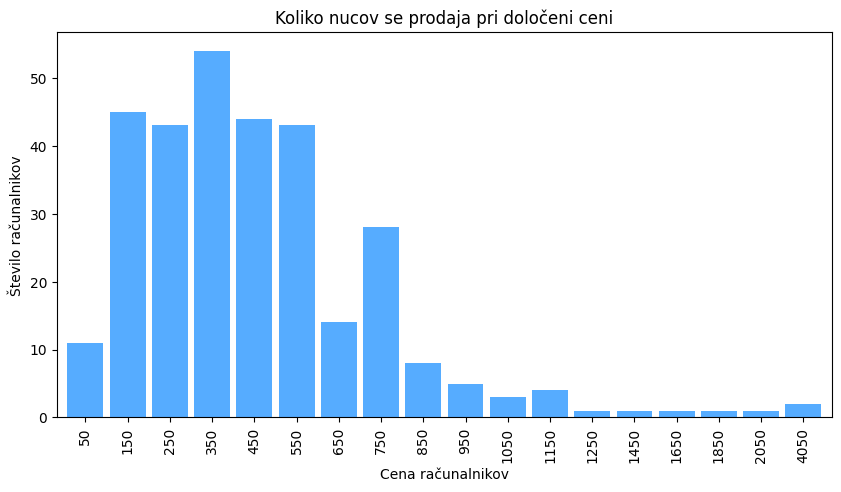

In [285]:
ax = nuci['cena_discrete'].value_counts().sort_index().plot.bar(
    color='dodgerblue', alpha=0.75, linewidth=1, width=0.85
)
ax.set_xlabel('Cena računalnikov')
ax.set_ylabel('Število računalnikov')
ax.set_title('Koliko nucov se prodaja pri določeni ceni')

### 1.2 Nadaljnja analiza masovno prodajanih računalnikov

Največ računalnikov ima ceno med 300 in 400€. Najverjetneje je to zato, ker je trg za računalnike v takem cenovnem razredu največji. Podrobneje si poglejmo le-te:

In [286]:
nuci[nuci['cena_discrete'] == 350].head(3)

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id,cena_discrete
355,"CHUWI Mini PC LarkBox X, AMD Ryzen™7 3750H Pro...",399.0,B00OKAHH8O,30.0,4.3,254,8,False,False,5,1,11,3,350
215,"CHUWI Mini PC LarkBox X, AMD Ryzen™7 3750H Pro...",399.0,B00OKAHH8O,30.0,4.3,254,8,False,True,5,1,11,3,350
369,"CHUWI Mini PC LarkBox X, AMD Ryzen™7 3750H Pro...",399.0,B00OKAHH8O,30.0,4.3,254,8,False,True,5,1,11,3,350


Zanima me, kako se razlikujejo povprečne ocene med temi računalniki - je eden res lahko toliko boljši od drugega? Tukaj zavržem tiste računalnike, kjer je število ocen manjše od 10, saj nam tam že en slab review porodi bistveno slabšo povprečno oceno

Text(0.5, 1.0, 'Masovno prodajani računalniki (300-400€), urejeni po oceni')

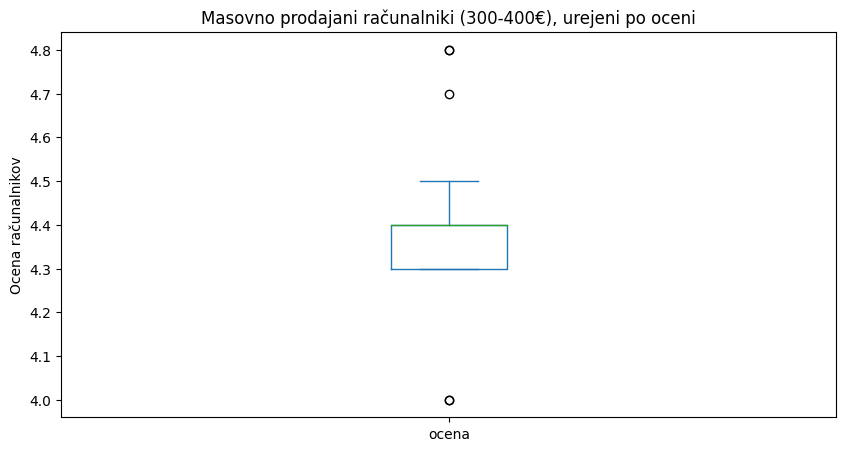

In [287]:
ax = nuci[
    (nuci['cena_discrete'] == 350) & (nuci['stevilo_ocen'] >= 10)
].plot.box(column=['ocena'])
ax.set_ylabel('Ocena računalnikov')
ax.set_title('Masovno prodajani računalniki (300-400€), urejeni po oceni')

Povprečna ocena računalnikov v takem cenovnem razredu je $4.4$ z vrednostima $4.0$ in $4.8$ kot naši anomaliji. Pokazano drugače, tako izgledajo naši rezultati:

Text(0.5, 1.0, 'Porazdelitev masovno prodajanih računalnikov (300-400€) po oceni')

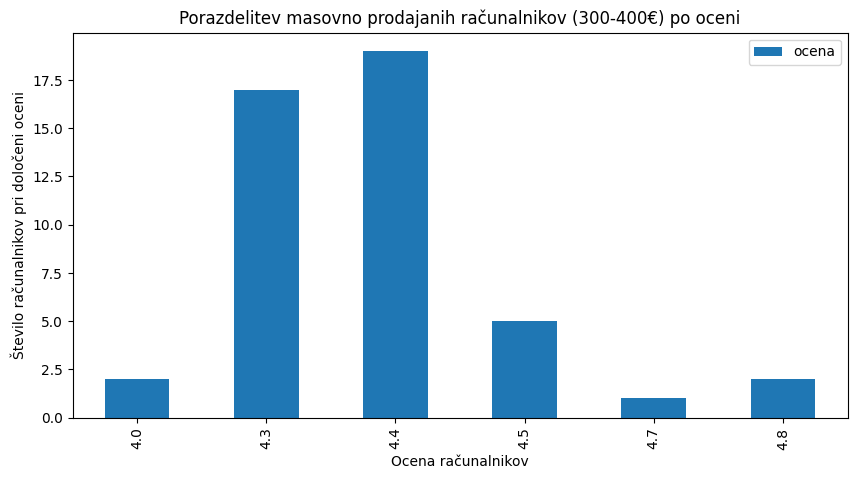

In [288]:
ax = pd.DataFrame(
    nuci[
    (nuci['cena_discrete'] == 350) & (nuci['stevilo_ocen'] >= 10)
][
    'ocena'
].value_counts(
).sort_values(
    ascending=False
).sort_index()
).plot.bar()

ax.set_xlabel('Ocena računalnikov')
ax.set_ylabel('Število računalnikov pri določeni oceni')
ax.set_title('Porazdelitev masovno prodajanih računalnikov (300-400€) po oceni')

### 1.3 Anomalije v ocenah

Poglejmo si ta dva ekstrema ocen:

In [289]:
nuci[
    (nuci['cena_discrete'] == 350) & (nuci['stevilo_ocen'] >= 10) & ((nuci['ocena'] == 4) | (nuci['ocena'] == 4.8))
].sort_values('ocena')

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id,cena_discrete
252,Lenovo ThinkCentre M900 Tiny Mini PC | Intel C...,343.0,B09BCPC6G2,0.0,4.0,45,27,False,False,1,1,18,3,350
349,Lenovo ThinkCentre M900 Tiny Mini PC | Intel C...,343.0,B09BCPC6G2,0.0,4.0,45,27,False,False,1,1,18,3,350
311,STRHIGP Firewall Mini PC OPNsense Celeron J412...,353.0,B09QM69CJ8,0.0,4.8,13,8,False,False,16,5,8,8,350
301,HSIPC Jasper Lake Celeron N5105 Quad Core Fire...,325.0,B0B1LPR3NQ,0.0,4.8,29,8,False,False,22,5,18,3,350


Hmm, izgleda, da sta NUCa s povprečno oceno $4.0$ v bistvu ista računalnika, ki sta se na Amazonu pojavila dvakrat.

In [290]:
def zdruzi_vse_podatke_v_eno_tabelo(df):
    """Levo zdruzi (pofiltrirano) tabelo nuci z tabelami operacijski_sistem, proizvajalci, ram, ssd ter vrne zdruzeno tabelo"""
    return df.merge(
        ssd, on='ssd_id', how='left'
        ).merge(
            ram, on='ram_id', how='left'
        ).merge(
            proizvajalci, on='proizvajalec_id', how='left'
        ).merge(
        operacijski_sistemi, left_on='OS_id', right_on='operacijski_sistem_id', how='left'
    )

In [291]:
anomalije_zdruzene = zdruzi_vse_podatke_v_eno_tabelo(
    nuci[
        (nuci['cena_discrete'] == 350) & 
        (nuci['stevilo_ocen'] >= 10) & 
        ((nuci['ocena'] == 4) | (nuci['ocena'] == 4.8))
    ].sort_values('ocena')
).drop_duplicates()

Vzamem en NUC z oceno $4.0$ in enega z $4.8$ ter primerjam njune glavne specifikacije

In [292]:
anomalije_zdruzene = anomalije_zdruzene[
    (anomalije_zdruzene['id'] == 'B09BCPC6G2') |
    (anomalije_zdruzene['id'] == 'B0B1LPR3NQ')
][
    ['id', 'opis', 'vrednost_kupona', 'ocena', 
     'stevilo_ocen', 'cas_dostave', 'ssd', 'ram', 
     'proizvajalec', 'operacijski_sistem']
]

In [293]:
anomalije_zdruzene

,id,opis,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,ssd,ram,proizvajalec,operacijski_sistem
0,B09BCPC6G2,Lenovo ThinkCentre M900 Tiny Mini PC | Intel C...,0.0,4.0,45,27,unknown,8,Intel,Windows
3,B0B1LPR3NQ,HSIPC Jasper Lake Celeron N5105 Quad Core Fire...,0.0,4.8,29,8,unknown,8,unknown,unknown


O računalniku z višjo oceno izvemo bolj malo stvari. Vseeno je glavna razlika videti v času dostave računalnikov.

### 1.4 Analiza časa dostave računalnikov

Poglejmo si več o času dostave računalnikov:

Text(0.5, 1.0, 'Porazdelitev časa dostave računalnikov')

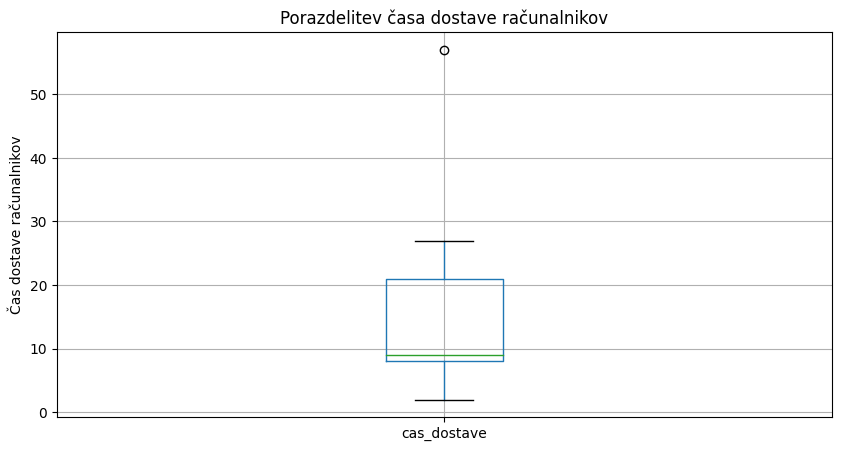

In [294]:
ax = nuci[nuci['cas_dostave'] != -1].boxplot(
    column=['cas_dostave'],
    grid=True
)

ax.set_ylabel('Čas dostave računalnikov')
ax.set_title('Porazdelitev časa dostave računalnikov')

Večino računalnikov se dostavi v desetih dneh, opazimo pa, da so redki primeri, ki naše podatke o povprečni dostavi potegnejo strmo navzgor.

Prej smo videli, da je bila glavna razlika med računalnikoma z visoko in nizko oceno čas dostave računalnikov. Zanima me, kako sta povezana čas dostave in povprečna ocena računalnikov v splošnem.

In [295]:
nuci

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id,cena_discrete
123,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12,4050
249,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12,4050
326,Intel NUC 9 Pro Kit with 9th Generation Intel ...,2013.71,B086LFB22V,0.0,5.0,7,-1,False,False,1,5,18,12,2050
231,Intel NUC BKNUC9VXQNX2 PC / Workstation Barebo...,1829.69,B084K1SV45,0.0,4.2,5,15,False,False,1,4,18,12,1850
31,"Intel NUC 11, Intel Core i7-1165G7, 2.8-4.7GHz...",1699.99,B09KR9QQCR,0.0,4.5,12,21,False,False,1,5,18,12,1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Gigabyte GB-BACE-3000 (rev. 1.0) BGA 1170 1.04...,69.99,B01BLVFQF0,0.0,3.1,15,13,False,False,1,4,18,12,50
393,Landalanya Replacement CPU Fan for Intel NUC N...,39.66,B09C4F6J76,0.0,4.8,6,-1,False,False,1,5,18,12,50
377,"SilverStone SST-PT14-H1T1; Petit Intel NUC, Bo...",29.83,B00GSAOEQW,0.0,4.7,63,14,False,False,1,5,18,12,50
24,HumanCentric Intel NUC VESA Mount for NUC Mini...,12.99,B07KB4YWQS,0.0,4.6,584,8,False,False,1,5,18,12,50


Text(0.5, 1.0, 'Povezava med oceno, časom dostave in številom ocen računalnika')

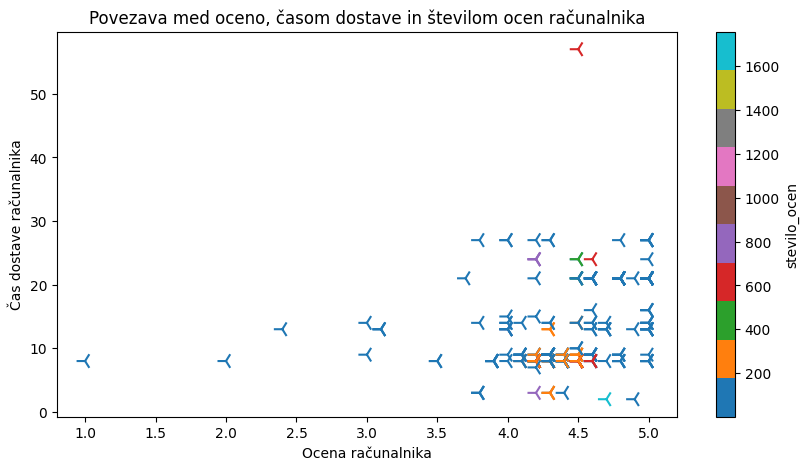

In [297]:
ax = nuci[
    (nuci['cas_dostave'] != -1)
].plot.scatter(
    x='ocena', 
    y='cas_dostave', 
    c='stevilo_ocen', 
    colormap='tab10', 
    marker='3', 
    s=150
)
ax.set_xlabel('Ocena računalnika')
ax.set_ylabel('Čas dostave računalnika')
ax.set_title('Povezava med oceno, časom dostave in številom ocen računalnika')

Hm - zdi se, da med oceno in časom dostave ni resne povezave. Vseeno pa je iz grafa razvidno, da so tisti računalniki z nižjo oceno ocenjeni manjkrat.

In [298]:
zdruzeni_nuci = zdruzi_vse_podatke_v_eno_tabelo(
    nuci
).drop(
    ['operacijski_sistem_id', 'OS_id', 'ssd_id', 'ram_id', 'proizvajalec_id'], axis=1
)

In [299]:
zdruzeni_nuci.tail()

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,cena_discrete,ssd,ram,proizvajalec,operacijski_sistem
304,Gigabyte GB-BACE-3000 (rev. 1.0) BGA 1170 1.04...,69.99,B01BLVFQF0,0.0,3.1,15,13,False,False,50,unknown,unknown,Intel,no OS
305,Landalanya Replacement CPU Fan for Intel NUC N...,39.66,B09C4F6J76,0.0,4.8,6,-1,False,False,50,unknown,unknown,Intel,unknown
306,"SilverStone SST-PT14-H1T1; Petit Intel NUC, Bo...",29.83,B00GSAOEQW,0.0,4.7,63,14,False,False,50,unknown,unknown,Intel,unknown
307,HumanCentric Intel NUC VESA Mount for NUC Mini...,12.99,B07KB4YWQS,0.0,4.6,584,8,False,False,50,unknown,unknown,Intel,unknown
308,HumanCentric Intel NUC VESA Mount for NUC Mini...,12.99,B07KB4YWQS,0.0,4.6,584,8,False,False,50,unknown,unknown,Intel,unknown


### 1.5 Analiza delovnega spomina (RAM) računalnika

Text(0.5, 1.0, 'Porazdelitev računalnikov glede na RAM')

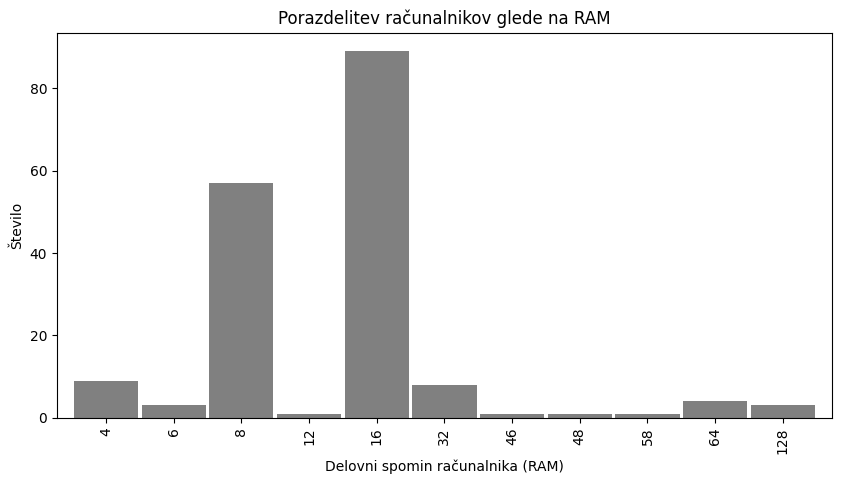

In [300]:
ax = zdruzeni_nuci[zdruzeni_nuci['ram'] != 'unknown'].astype(
    {'ram': 'int64'}
)['ram'].value_counts().sort_index().plot.bar(
    width=0.95,
    align='center',
    color='grey',
)

ax.set_xlabel('Delovni spomin računalnika (RAM)')
ax.set_ylabel('Število')
ax.set_title('Porazdelitev računalnikov glede na RAM')

### 1.6 Analiza SSD-ja računalnika

Text(0.5, 1.0, 'Porazdelitev računalnikov glede na SSD')

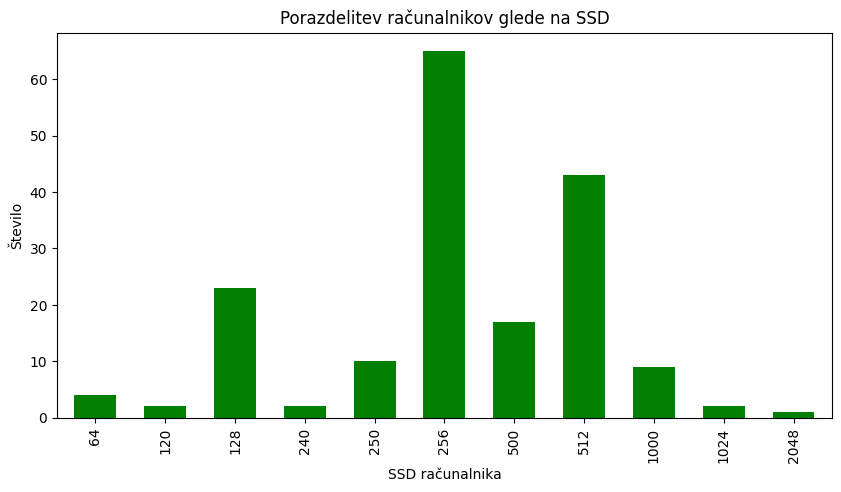

In [301]:
ax = zdruzeni_nuci[zdruzeni_nuci['ssd'] != 'unknown'].astype(
    {'ssd': 'int64'}
)['ssd'].value_counts().sort_index().plot.bar(
    width=0.6,
    align='center',
    color='green',
)

ax.set_xlabel('SSD računalnika')
ax.set_ylabel('Število')
ax.set_title('Porazdelitev računalnikov glede na SSD')

### 1.7 Povezava med RAM-om in SSD-jem

Upoštevati je treba, kapacitete RAM-a in SSD-ja običajno nastopajo v potencah števila 2. Če v zgornjih dveh grafih zavržemo števila, ki niso potence števila 2, dobimo lepe, približno normalno porazdeljene podatke o teh dveh kapacitetah računalnikov. Največ je računalnikov, ki imajo 16 GB RAMa in 256 GB SSD-ja. Številke so smiselne, saj je dandanes to standardna kapaciteta računalnikov.

Text(0.5, 1.0, 'Točkovna povezava med delovnim spominom in pomnilnikom računalnika ')

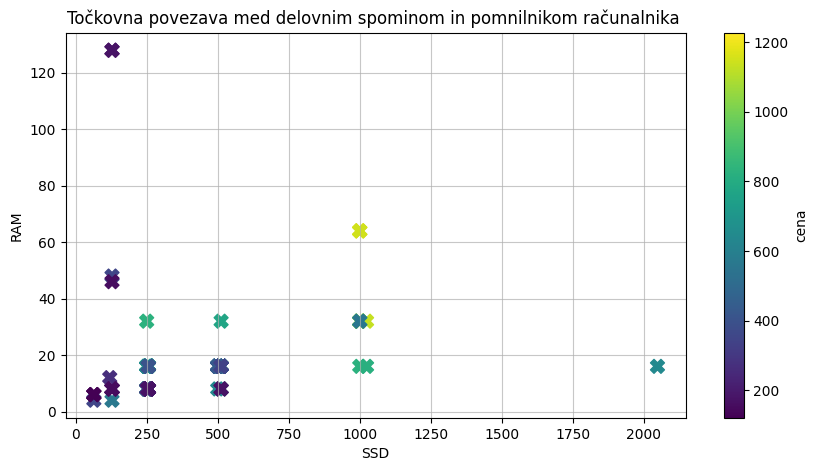

In [302]:
ax = zdruzeni_nuci[
    (zdruzeni_nuci['ssd'] != 'unknown') &
    (zdruzeni_nuci['ram'] != 'unknown')
].astype(
    {'ssd': 'int64', 'ram': 'int64'}
).plot.scatter(
    x='ssd', 
    y='ram', 
    s=100, 
    marker='X',
    c='cena'
)
ax.grid(alpha=0.7)
ax.set_xlabel('SSD')
ax.set_ylabel('RAM')
ax.set_title('Točkovna povezava med delovnim spominom in pomnilnikom računalnika ')

Žal je podatkov premalo, da bi lahko naredili lep sklep, videti pa je, da večja kapaciteta delovnega pomnilnika (RAMa) implicira tudi večji pospešeni računalniški spomin in obratno. Pričakovali bi, da bi nekako dobili linearno povezavo med kapaciteto RAMa in SSDja v računalniku. Z izjemo dveh anomalij v kotih grafa, naš graf tudi nakazuje na povezavo med RAMom in SSD-jem.

Obstaja pa očitna povezava med naraščanjem RAMa oz SSDja ter ceno računalnikov - z večanjem računalniških kapacitet raste tudi cena :)

### 1.8 Korelacijska matrika podatkov

Oglejmo si še druge možne povezave med podatki v naši tabeli:

In [303]:
zdruzeni_nuci.corr()

/var/folders/9s/v0gzy6497956yzhn8x7gf8mh0000gn/T/ipykernel_55287/2224094166.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  zdruzeni_nuci.corr()


,cena,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,cena_discrete
cena,1.000000,0.091654,0.166392,-0.236813,0.178430,0.064104,-0.037304,0.997230
vrednost_kupona,0.091654,1.000000,0.110559,-0.047127,0.129436,0.167866,0.345434,0.069202
ocena,0.166392,0.110559,1.000000,-0.100828,0.279475,-0.005960,0.180301,0.180504
stevilo_ocen,-0.236813,-0.047127,-0.100828,1.000000,-0.110277,-0.042101,0.005245,-0.234530
cas_dostave,0.178430,0.129436,0.279475,-0.110277,1.000000,-0.035281,0.133167,0.183839
amazons_choice,0.064104,0.167866,-0.005960,-0.042101,-0.035281,1.000000,0.021925,0.055305
produkt_sponzoriran,-0.037304,0.345434,0.180301,0.005245,0.133167,0.021925,1.000000,-0.031842
cena_discrete,0.997230,0.069202,0.180504,-0.234530,0.183839,0.055305,-0.031842,1.000000


Omeniti gre par intuitivno smiselnih sklepov:
- Vrednost kupona je v pozitivni korelaciji s ceno, saj višji kupon ("popust") implicira tudi prvotno višjo ceno. S kuponom torej ne profitiramo kaj dosti...
- Cena je v negativni korelaciji z številom ocen, saj manj ljudi kupuje dražje računalnike.
- Višja ocena je pozitivno povezana s časom dostave, saj bodo ljudje bolj zadovoljni, če bodo računalnik prejeli prej.

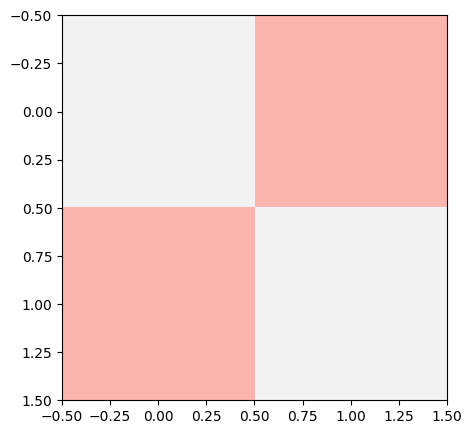

In [304]:
t = zdruzeni_nuci[['ssd', 'ram']][
    (zdruzeni_nuci['ssd'] != 'unknown')
    & (zdruzeni_nuci['ram'] != 'unknown')
].astype({'ssd': 'float', 'ram': 'float'})


corr_matrix_ssd_ram = np.corrcoef(t.values, rowvar=False)
plt.close()
plt.imshow(corr_matrix_ssd_ram, interpolation='antialiased', cmap='Pastel1')
plt.show()


In [305]:
corr_matrix_ssd_ram

array([[1.       , 0.2187291],
       [0.2187291, 1.       ]])

Graf in korelacijska matrika zgoraj nakazujeta na negativno povezavo med RAM-om in SSD-jem! Sklepal bi, da se to zgodi zaradi dveh anomalij, predstavljeni v grafih zgoraj.

### 1.9 Proizvajalec računalnikov

Podrobneje si oglejmo še razlike med proizvajalci NUCev.

Text(0.5, 1.0, 'Porazdelitev računalnikov po proizvajalcih')

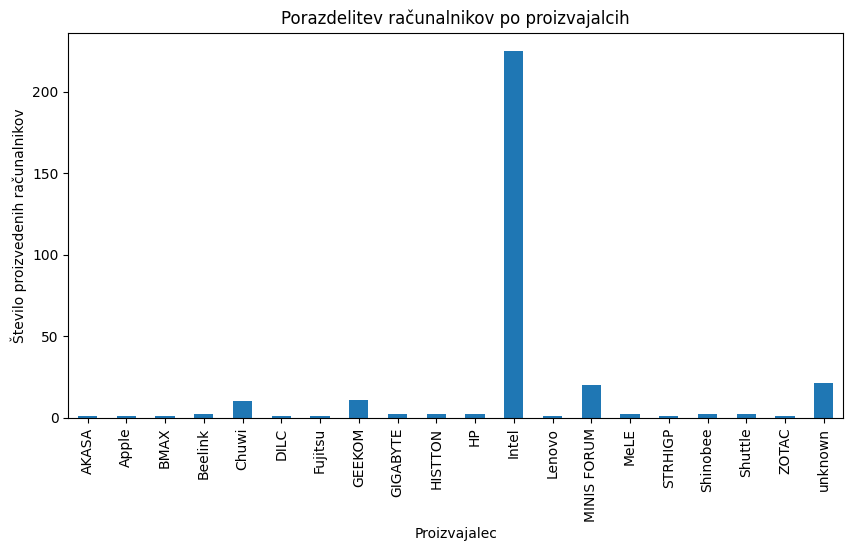

In [306]:
nuci_po_proizvajalcih = zdruzeni_nuci.groupby('proizvajalec').count()
ax = nuci_po_proizvajalcih['opis'].plot.bar()

ax.set_xlabel('Proizvajalec')
ax.set_ylabel('Število proizvedenih računalnikov')
ax.set_title('Porazdelitev računalnikov po proizvajalcih')

Intel več kot očitno dominira na tem področju :)

In [307]:
zdruzeni_nuci_po_proizvajalcih = zdruzeni_nuci.groupby('proizvajalec').mean()[
    [
        'cena', 
        'vrednost_kupona', 
        'ocena', 
        'stevilo_ocen', 
        'amazons_choice', 
        'produkt_sponzoriran'
    ]
].join(
    nuci_po_proizvajalcih[['opis']].rename(
        columns={'opis': 'stevilo_proizvedenih'}
    )
).sort_values(
    'stevilo_proizvedenih', 
    ascending=False
)


zdruzeni_nuci_po_proizvajalcih

/var/folders/9s/v0gzy6497956yzhn8x7gf8mh0000gn/T/ipykernel_55287/1004907703.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zdruzeni_nuci_po_proizvajalcih = zdruzeni_nuci.groupby('proizvajalec').mean()[


,cena,vrednost_kupona,ocena,stevilo_ocen,amazons_choice,produkt_sponzoriran,stevilo_proizvedenih
proizvajalec,,,,,,,
Intel,489.734889,24.648889,4.417778,99.826667,0.008889,0.373333,225
unknown,632.698095,7.619048,4.695238,52.809524,0.000000,0.000000,21
MINIS FORUM,321.280000,11.000000,4.460000,426.250000,0.000000,0.600000,20
GEEKOM,501.808182,68.181818,4.590909,165.181818,0.000000,0.818182,11
Chuwi,399.000000,30.000000,4.300000,254.000000,0.000000,0.900000,10
HISTTON,484.000000,0.000000,4.300000,62.000000,0.000000,0.000000,2
Shuttle,252.990000,0.000000,4.800000,3.000000,0.000000,0.000000,2
Shinobee,177.000000,0.000000,4.000000,2.000000,0.000000,0.000000,2
MeLE,354.990000,40.000000,4.500000,211.000000,0.000000,0.000000,2


Iz zgolj enega ali dveh proizvedenih računalnikov težko kaj sklepamo o prizvajalcu. Zato bom tiste proizvajalce s samo enemu ali dvema računalnikoma na trgu umaknil.

In [308]:
zdruzeni_nuci_po_proizvajalcih = zdruzeni_nuci_po_proizvajalcih[
    zdruzeni_nuci_po_proizvajalcih['stevilo_proizvedenih'] > 2
].rename(
        columns={
            'cena': 'povprecna_cena',
            'vrednost_kupona': 'povprecna_vrednost_kupona',
            'ocena': 'povprecna_ocena',
            'stevilo_ocen': 'povprecno_stevilo_ocen'
        }
    )

In [309]:
zdruzeni_nuci_po_proizvajalcih

,povprecna_cena,povprecna_vrednost_kupona,povprecna_ocena,povprecno_stevilo_ocen,amazons_choice,produkt_sponzoriran,stevilo_proizvedenih
proizvajalec,,,,,,,
Intel,489.734889,24.648889,4.417778,99.826667,0.008889,0.373333,225
unknown,632.698095,7.619048,4.695238,52.809524,0.000000,0.000000,21
MINIS FORUM,321.280000,11.000000,4.460000,426.250000,0.000000,0.600000,20
GEEKOM,501.808182,68.181818,4.590909,165.181818,0.000000,0.818182,11
Chuwi,399.000000,30.000000,4.300000,254.000000,0.000000,0.900000,10


Za konec si poglejmo še podatke o različnih proizvajalcih:

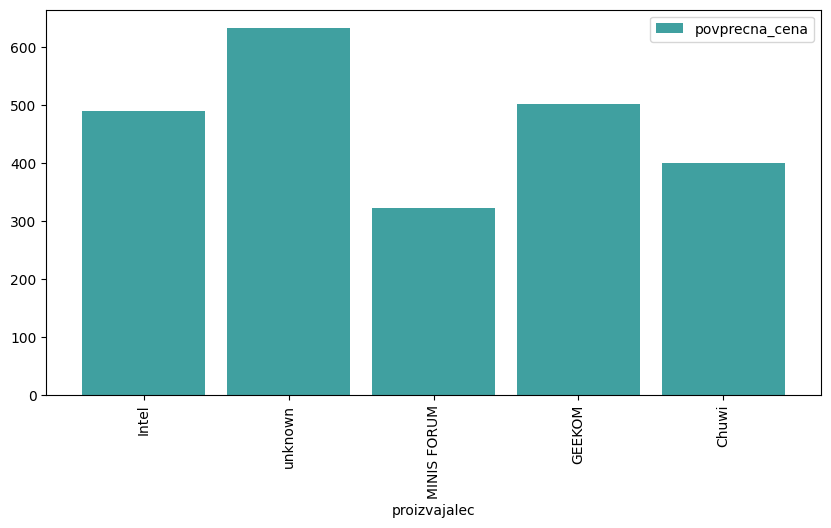

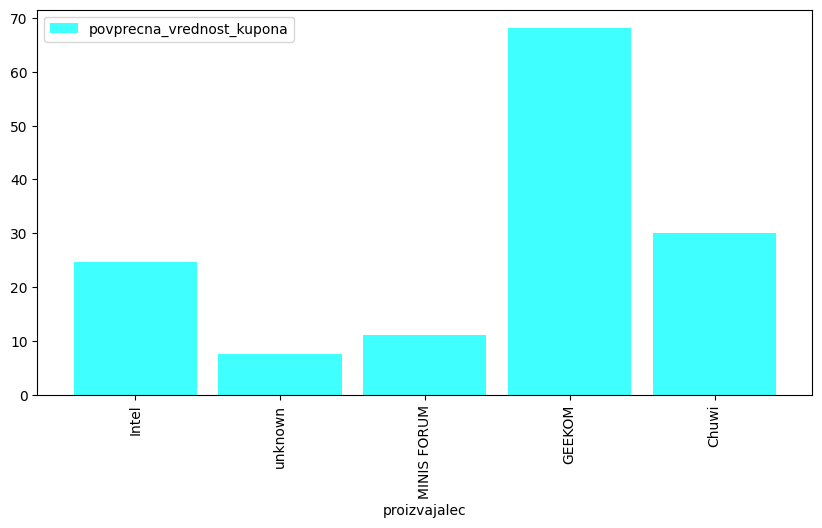

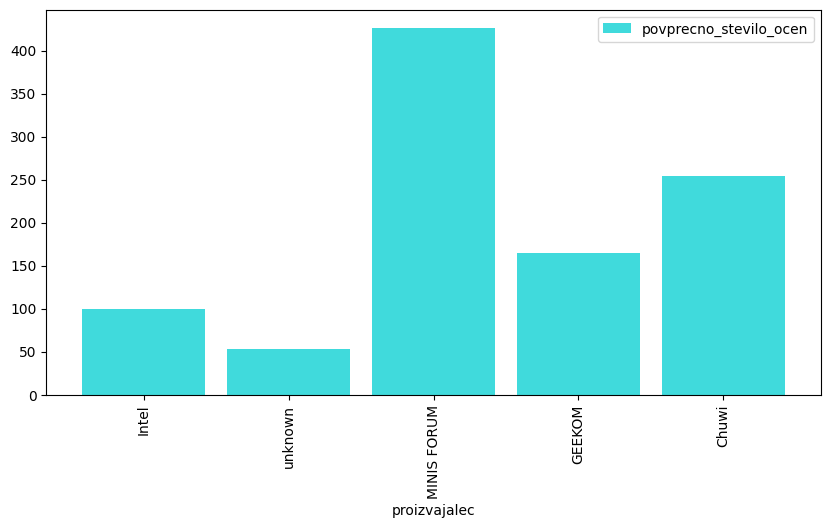

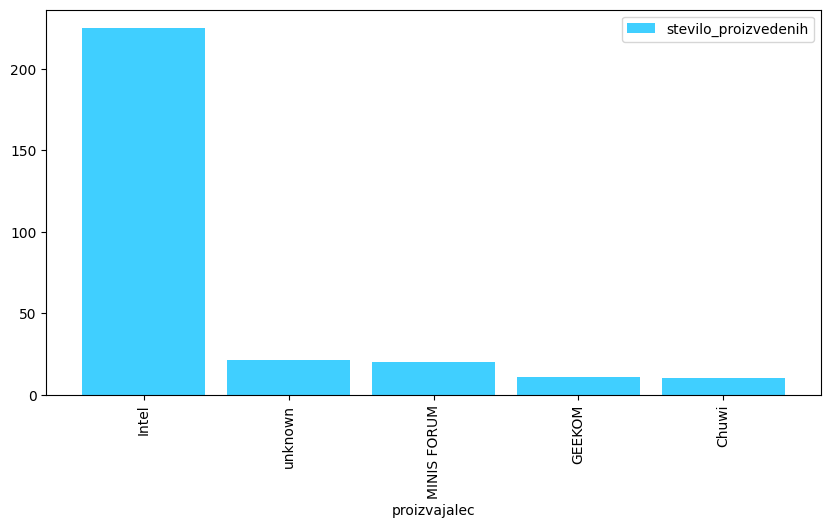

In [310]:
tickers = ['povprecna_cena', 'povprecna_vrednost_kupona', 'povprecno_stevilo_ocen', 'stevilo_proizvedenih']
tickers_color_mapping = {
    'povprecna_cena': 'teal',
    'povprecna_vrednost_kupona': 'aqua',
    'povprecno_stevilo_ocen': 'darkturquoise',
    'stevilo_proizvedenih': 'deepskyblue',
}
for ticker in tickers:
    zdruzeni_nuci_po_proizvajalcih[[ticker]].plot.bar(
        color=tickers_color_mapping.get(ticker, 'black'), 
        alpha=0.75, 
        linewidth=1, 
        width=0.85
    )

Zanimivo je videti, da ima GEEKOM toliko višje povprečne vrednosti kupona kot vsi ostali. Predstavljam si, da s svojimi hočejo bolj prodreti na trg ter kupcem zato ponujati približno dvakrat in pol večje kupone kot naslednja (Intel, Chuwi).

Preseneti me, da čeprav je sicer Intel največji proizvajalec računalnikov na trgu, pa za vsak računalnik posebej največ pozornosti dobijo računalniki MINIS FORUMa - imajo namreč največ ocen za vsak računalnik. Njihova povprečna cena je prav tako malce višja od Intelove.